## Human Resources Promotion Explatory Analysis

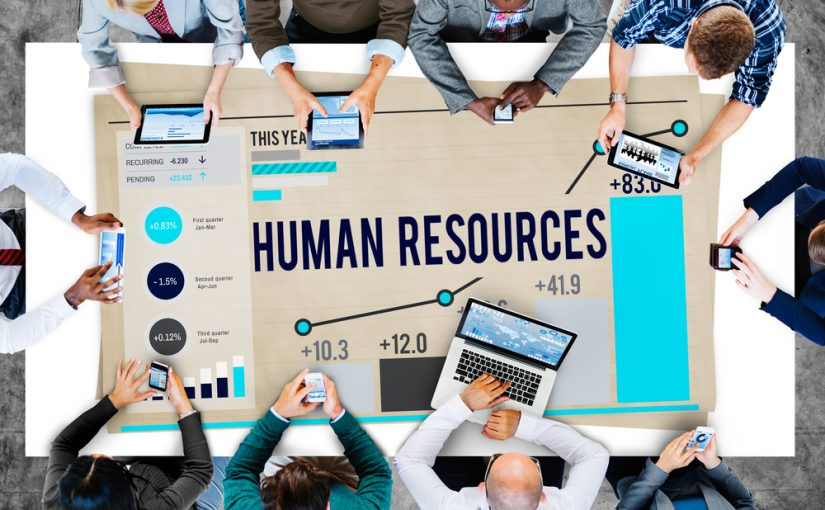

### Introduction

This dataset downloaded from Kaggle.

* employee_id - Unique ID for employee

* department - Department of employee

* region - Region of employment (unordered)

* education - Education Level

* gender - Gender of Employee

* recruitment_channel - Channel of recruitment for employee

* nooftrainings - Number of trainings completed in previous year on soft skills, technical skills etc.

* age - Age of Employee

* previousyearrating - Employee Rating for the previous year

* lengthofservice - Length of service in years

* KPIs_met >80% - Percent of KPIs(Key performance Indicators) >80% (yes - 1, no - 0)

* awards - Awards won during previous year (yes - 1, no - 0)

* avgtrainingscore - Average score in current training evaluations

* is_promoted - (Target) Recommended for promotion

### Importing required packages

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("pastel")
import squarify

import warnings
warnings.filterwarnings("ignore")

### Loading data into DataFrame

In [2]:
df = pd.read_csv('data.csv')
df_copy = df.copy(deep=True)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [4]:
print(df.shape)

(54808, 14)


Total record in dataset = 23490<br> Columns in the dataset = 13

### Data Pre-processing

In [5]:
df.rename(columns = {'awards_won?':'awards'}, inplace=True)

In [6]:
df.gender = df.gender.str.replace('m', 'male', regex=True)

In [7]:
df.gender = df.gender.str.replace('f', 'female', regex=True)

In [8]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards                     0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [10]:
df.education = df.education.astype(object).fillna('no_info')

In [11]:
df.previous_year_rating = df.previous_year_rating.astype(object).fillna('no_info')

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards                  0
avg_training_score      0
is_promoted             0
dtype: int64

The columns "education" (2409) and "previous_year_rating" (4124) have NaN values. There are no duplicate values. I made some technical changes: changed the NaN values to 'no_info' - this will help not to distort the totals in these columns.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


Descriptive statistics summary of data.

In [15]:
tmp_features = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'previous_year_rating']
for f in tmp_features:
    df[f] = df[f].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  category
 2   region                54808 non-null  category
 3   education             54808 non-null  category
 4   gender                54808 non-null  category
 5   recruitment_channel   54808 non-null  category
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  int64   
 8   previous_year_rating  54808 non-null  category
 9   length_of_service     54808 non-null  int64   
 10  KPIs_met >80%         54808 non-null  int64   
 11  awards                54808 non-null  int64   
 12  avg_training_score    54808 non-null  int64   
 13  is_promoted           54808 non-null  int64   
dtypes: category(6), int64(8)
memory usage: 3.7 MB


Also, we changed the dtype for "department", "region", "education", "gender", "previous_year_rating  " and "recruitment_channel" from "Object" to "Category". This will help decrease memory usage.

### Univariate Analysis

**Categorical features**

**Departments**

In [16]:
pd.DataFrame(df.department.value_counts())

,department
Sales & Marketing,16840
Operations,11348
Procurement,7138
Technology,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


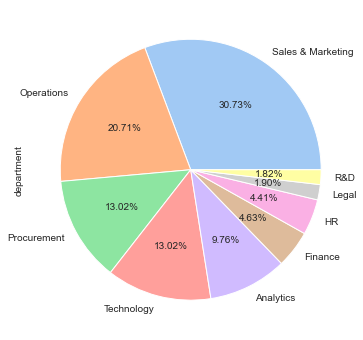

In [17]:
plt.figure(figsize=(8,6))
df.department.value_counts().plot.pie(autopct='%1.2f%%');

Sales and Marketing (16,840) and Operations (11,348) receive the most applicants. R&D (999) is less than others. Our department - Analytics is in the middle of the list - about 10% of the total number of job seekers...

**Regions**

In [18]:
pd.DataFrame(df.region.value_counts().nlargest(10))

,region
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659
region_16,1465


Top 10 regions.

### Education

In [19]:
pd.DataFrame(df.education.value_counts(dropna=False))

,education
Bachelor's,36669
Master's & above,14925
no_info,2409
Below Secondary,805


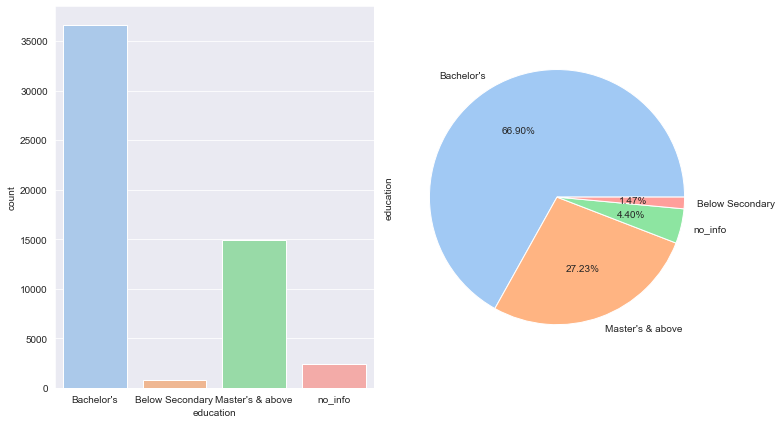

In [20]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,6))
sns.countplot(df.education, ax=ax[0])
df.education.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1])
plt.tight_layout();

Most applicants are educated people. 94.13% of applicants have a bachelor's or master's degree.

**Gender**

In [21]:
pd.DataFrame(df.gender.value_counts(dropna=False))

,gender
male,38496
female,16312


The number of males exceed the number of females more than twice.

**Recruitment channel**

In [22]:
pd.DataFrame(df.recruitment_channel.value_counts(dropna=False))

,recruitment_channel
other,30446
sourcing,23220
referred,1142


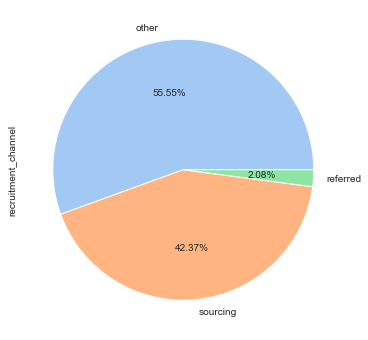

In [23]:
plt.figure(figsize=(8,6))
df.recruitment_channel.value_counts().plot.pie(autopct='%1.2f%%');

To my surprise, the “referred” is only 2.08%.

**Previous year rating**

In [24]:
pd.DataFrame(df.previous_year_rating.value_counts(dropna=False))

,previous_year_rating
3.0,18618
5.0,11741
4.0,9877
1.0,6223
2.0,4225
no_info,4124


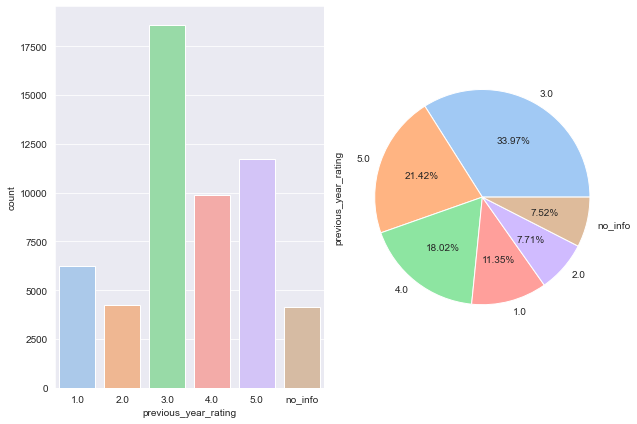

In [25]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
sns.countplot(df.previous_year_rating, ax=ax[0])
df.previous_year_rating.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1])
plt.tight_layout();

The rating of most applicants last year was between 3-5.

### Numerical features

In [26]:
def plot_uni(d):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--', linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g', linestyle='solid', linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [27]:
num_cols = ['age', 'length_of_service', 'avg_training_score']

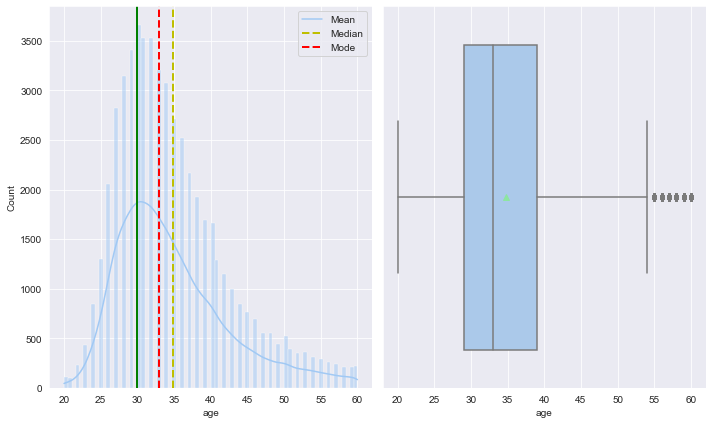

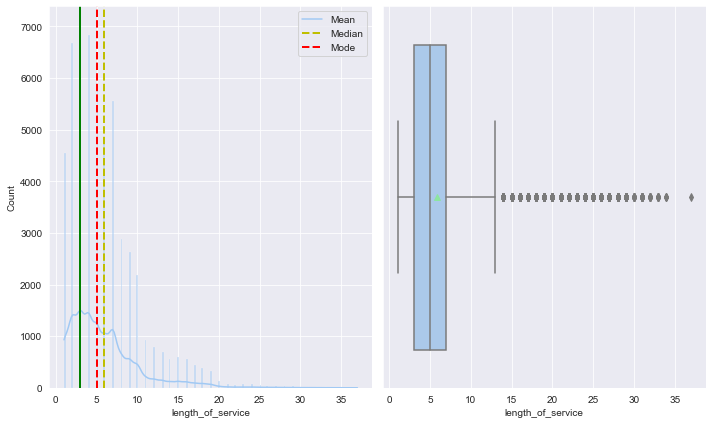

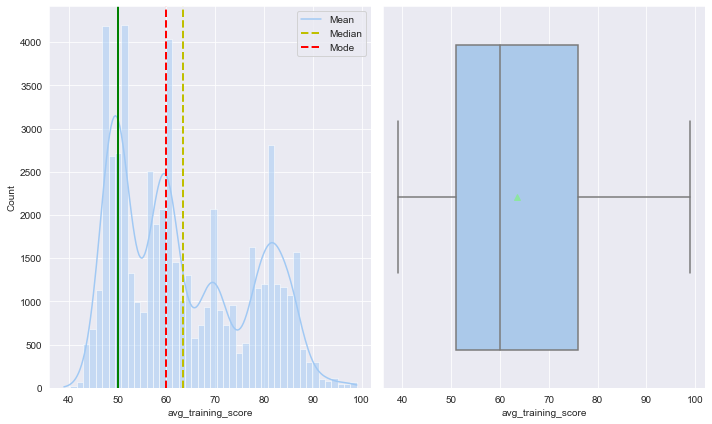

In [28]:
for f in num_cols:
    plot_uni(df[f])

**Age**
<br> 
- Age is skewed towards right.
- 50% of job seekers are between the ages of 29 and 39.
<br>

**Length of service**
<br>
- length_of_service is skewed towards right.
- The minimum work experience of applicants is 1 year, the maximum is 37 years.
- There are few outliers (higher end).
<br>

**Average training score**
- avg_training_score is skewed toward right.
- Average training score is 63.39

### Bivariate and Multivariate Analysis

In [29]:
pd.DataFrame(df.groupby(by=['department', 'gender'])['is_promoted'].mean())

is_promoted
department        gender             
Analytics         female     0.120858
                  male       0.092994
Finance           female     0.080764
                  male       0.081402
HR                female     0.057654
                  male       0.055241
Legal             female     0.040268
                  male       0.052809
Operations        female     0.094505
                  male       0.087093
Procurement       female     0.117128
                  male       0.078681
R&D               female     0.105263
                  male       0.066879
Sales & Marketing female     0.055802
                  male       0.075771
Technology        female     0.099354
                  male       0.112874

<Figure size 864x576 with 0 Axes>

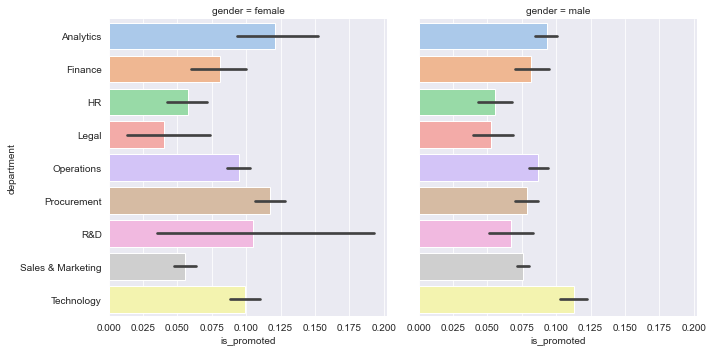

In [30]:
plt.figure(figsize=(12,8))
sns.catplot(x='is_promoted', y='department', col='gender', kind="bar", height=5, aspect=1, data=df);

Females are more likely to be promoted in Analytics, Operations, Procurement and R&D departments. Males are more likely to be promoted in the Legal, Sales & Marketing and Tecnology departments. The remaining departments have an equal ratio of males and females.

In [31]:
pd.DataFrame(df.groupby('recruitment_channel')['is_promoted'].mean())

,is_promoted
recruitment_channel,
other,0.083952
referred,0.120841
sourcing,0.085013


Although only 2.08% "referred" from total amount of job seekers, they have better chance to get a job.

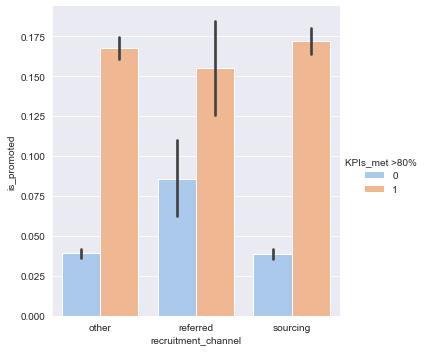

In [32]:
sns.catplot(y='is_promoted', x='recruitment_channel', hue='KPIs_met >80%', kind="bar", height=5, aspect=1, data=df);

However, those who have KPI>80, then the chances increase significantly.

In [33]:
pd.DataFrame(df.groupby(by=['no_of_trainings', 'awards'])['is_promoted'].mean())

is_promoted
no_of_trainings awards             
1               0          0.079235
                1          0.453853
2               0          0.068714
                1          0.395349
3               0          0.062680
                1          0.351351
4               0          0.053996
                1          0.200000
5               0          0.024000
                1          0.000000
6               0          0.047619
                1          0.000000
7               0          0.000000
8               0          0.000000
9               0          0.000000
10              0          0.000000

Among applicants with less than 5 years of training, receiving various awards significantly increases the chances of employment.

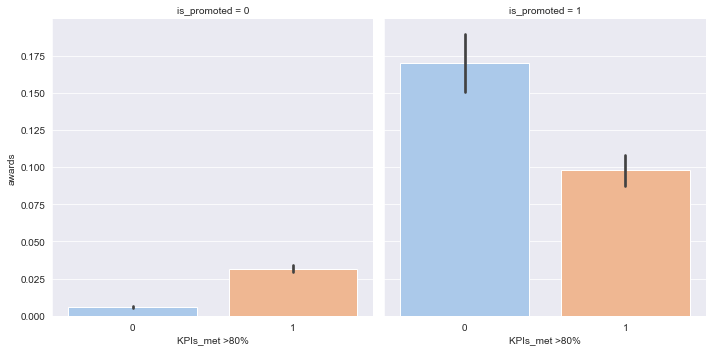

In [34]:
sns.catplot(x='KPIs_met >80%', y='awards', col='is_promoted', data=df, kind='bar');

As we mentioned earlier, high KPIs increase the chances, the same criteria works for award winners.

**Correlation**

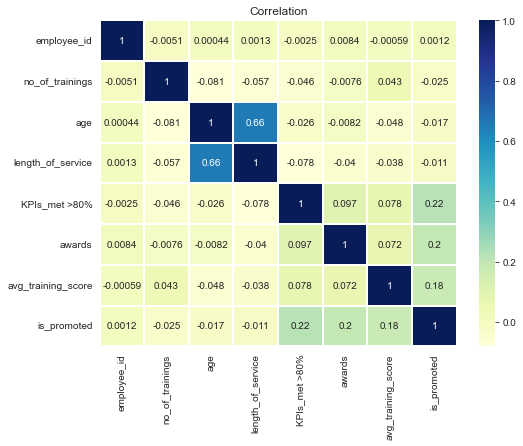

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(),cmap="YlGnBu", annot=True ,linewidths=0.2, linecolor='white')
plt.title("Correlation");

As expected, age and length_of_service are closely related, and vice versa.

### Conclusion

* Sales and Marketing (16,840) and Operations (11,348) receive the most applicants. R&D (999) is less than others. Our department - Analytics is in the middle of the list - about 10% of the total number of job seekers...

* Most applicants are educated people. 94.13% of applicants have a bachelor's or master's degree.

* The number of males exceed the number of females more than twice.

* The rating of most applicants last year was between 3-5.

* 50% of job seekers are between the ages of 29 and 39.

* The minimum work experience of applicants is 1 year, the maximum is 37 years.

* Average training score is 63.39

* Females are more likely to be promoted in Analytics, Operations, Procurement and R&D departments. Males are more likely to be promoted in the Legal, Sales & Marketing and Tecnology departments. The remaining departments have an equal ratio of males and females.

* Although only 2.08% "referred" from total amount of job seekers, but they have better chance to get a job.

* Among applicants with less than 5 years of training, receiving various awards significantly increases the chances of employment.

* As we mentioned earlier, high KPIs increase the chances, the same criteria works for award winners.

* As expected, age and length_of_service are closely related, and vice versa.

* This data set clearly demonstrates the very high competition for jobs. Somewhere the number of years of training helps, but, in my opinion, most of all, a high KPI gives a huge opportunity to get a job.
